<a href="https://colab.research.google.com/github/Harsh-gupta-07/PyTorch-Notes/blob/main/PyTorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.3

x = torch.arange(0,1,0.02)
y = x * weight + bias


In [ ]:
X_train, y_train = x[:40], y[:40]
X_test, y_test = x[40:], y[40:]

In [ ]:
def plot(train_data = X_train,
         train_label=y_train,
         test_data = X_test,
         test_label = y_test,
         predications = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_label,c="g",s=4,label="Testing Data")

  if predications is not None:
    plt.scatter(test_data,predications,c="r",s=4,label="predictions")

  plt.legend(prop={"size": 14})

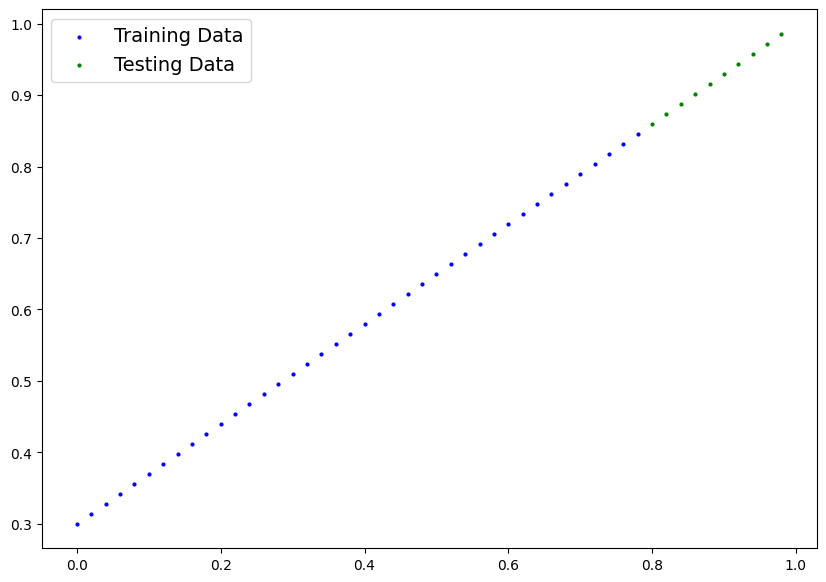

In [ ]:
plot()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype= torch.float))

# forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression formula

**IMP**

*   torch.nn :- contains all of the neural network built-in modules
*   torch.Parameter :- what parameters should our model try and learn, often pytorch layer from torch.nn will set these for us
*   torch.nn.Module :- the base class for all neural network modules, if you subclass it , you should overwrite forward()
*   torch.optim :- this where the optimizers in pytorch live.















### Checking the contents of model

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making Predictions without training

In [ ]:
X_test

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])

In [ ]:
# need to use inference_mode to make predictions faster
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

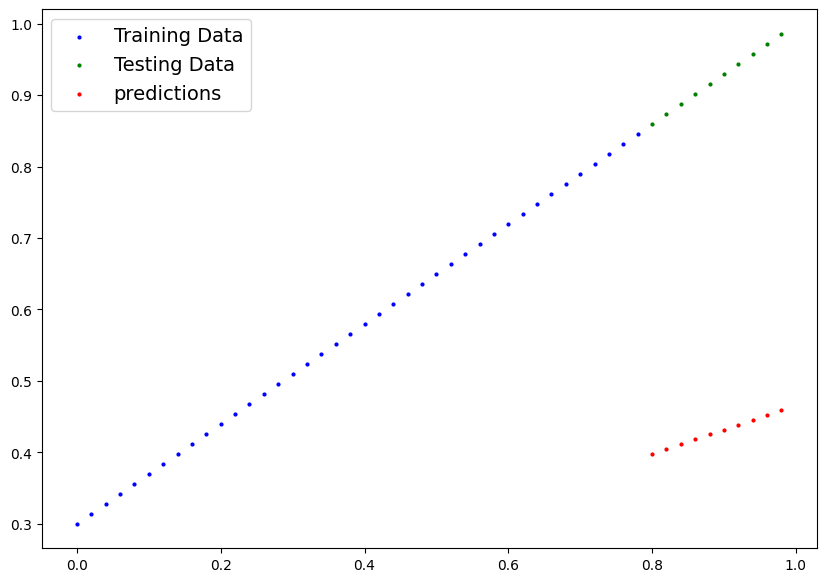

In [ ]:
plot(predications=y_preds)

## Train model

In [ ]:
# Loss function
loss_fn = nn.L1Loss()

#optimizer function (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### Building a training loop

0.   loop the data
1.   forward pass
2.   loss calc
3.   optimizer zero grad
4.   backward propagation
5.   optimizer step



In [ ]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []
#0. Loop through the data
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%10==0:
    model_0.eval()
    epoch_count.append(epoch)
    loss_values.append(loss)

    with torch.inference_mode():
        y_preds = model_0(X_test)

        y_loss = loss_fn(y_preds, y_test)
        test_loss_values.append(y_loss)
        print(f"Loss:- {y_loss}")

Loss:- 0.48106518387794495
Loss:- 0.3463551998138428
Loss:- 0.21729660034179688
Loss:- 0.14464017748832703
Loss:- 0.11360953003168106
Loss:- 0.09919948130846024
Loss:- 0.08886633068323135
Loss:- 0.0805937647819519
Loss:- 0.07232122868299484
Loss:- 0.06473556160926819
Loss:- 0.05646304413676262
Loss:- 0.04819049686193466
Loss:- 0.04060482233762741
Loss:- 0.03233227878808975
Loss:- 0.024059748277068138
Loss:- 0.016474086791276932
Loss:- 0.008201557211577892
Loss:- 0.005023092031478882
Loss:- 0.005023092031478882
Loss:- 0.005023092031478882


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

  y_loss = loss_fn(y_preds, y_test)
  print(y_loss)
y_preds

tensor(0.0084)


tensor([0.8685, 0.8825, 0.8965, 0.9105, 0.9245, 0.9384, 0.9524, 0.9664, 0.9804,
        0.9944])

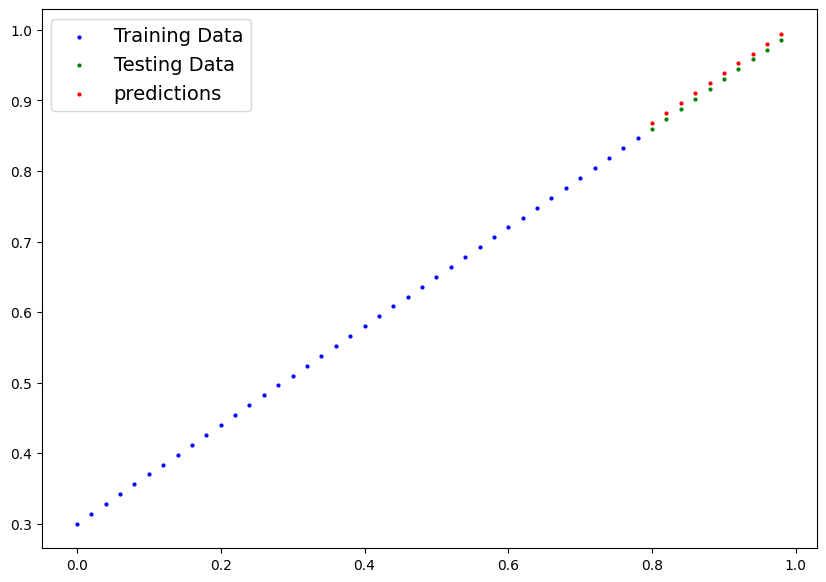

In [ ]:
plot(predications=y_preds)

/tmp/ipython-input-674123625.py:1: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count,np.array(torch.tensor(loss_values)),label="Training Loss")


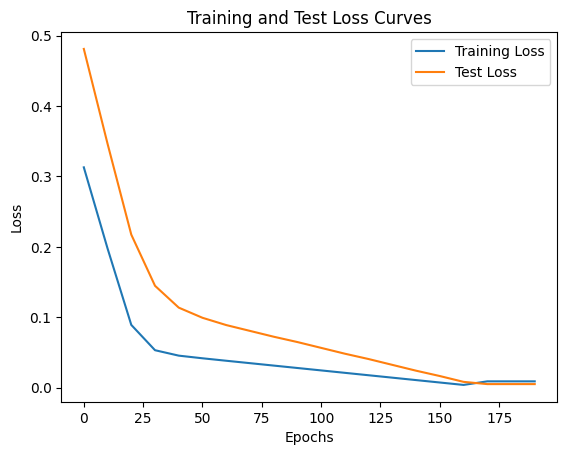

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values)),label="Training Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values)),label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();